In [1]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install plotly
!pip3 install rpy2



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


OSError: [Errno 5] Input/output error

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
from scipy import stats

In [ ]:
!pip3 install pyqt5

In [ ]:
!pip3 install bioinfokit

In [ ]:
table = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")

In [46]:
print(table.head(0))

Empty DataFrame
Columns: [gene_id, gene_name, old_human3_17A, old_human3_17B, old_human3_18A, old_human3_18B, old_human4_19A, old_human4_19B, old_human4_20A, old_human4_20B, old_organoid_1A, old_organoid_1B, old_organoid_2A, old_organoid_2B, old_organoid_3A, old_organoid_3B, treatment_met_4A, treatment_met_4B, treatment_met_5A, treatment_met_5B, treatment_met_6A, treatment_met_6B, treatment_nmn_7A, treatment_nmn_7B, treatment_nmn_8A, treatment_nmn_8B, treatment_nmn_9A, treatment_nmn_9B, treatment_res_10A, treatment_res_10B, treatment_res_11A, treatment_res_11B, treatment_res_12A, treatment_res_12B, young_human1_13A, young_human1_13B, young_human1_14A, young_human1_14B, young_human2_15A, young_human2_15B, young_human2_16A, young_human2_16B, young_organoid_27A, young_organoid_27B, young_organoid_28A, young_organoid_28B, young_organoid_29B]
Index: []

[0 rows x 47 columns]


In [ ]:
# extract names column
genes = table.iloc[:, 0]

#calculate averages of each row
gene_avg = table.iloc[:, 2:].mean(axis=1)

#create new table
avg_table = pd.DataFrame({'Genes':genes, 'Averages':gene_avg})
avg_table

In [ ]:
# find range
gene_min = table.iloc[:, 2:].min(axis=1)
gene_max = table.iloc[:, 2:].max(axis=1)
gene_range = gene_max - gene_min

# create new table
range_table = pd.DataFrame({'Genes':genes, 'Range':gene_range})
range_table

In [ ]:
# identify columns based sample type
oh_cols = table.filter(regex=r'^old_human').columns
oo_cols = table.filter(regex=r'^old_organoid').columns
yh_cols = table.filter(regex=r'^young_human').columns
yo_cols = table.filter(regex=r'^young_organoid').columns

# get averages of each gene of each sample
oh_avg = table[oh_cols].mean(axis=1)
oo_avg = table[oo_cols].mean(axis=1)
yh_avg = table[yh_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

# put into data frame
better_avg_table = pd.DataFrame({
    'Gene':genes,
    'Old Human':oh_avg,
    'Old Organoid':oo_avg,
    'Young Human':yh_avg,
    'Young Organoid':yo_avg
})

better_avg_table

In [ ]:
better_avg_table

In [ ]:
# old human range
oh_min = table[oh_cols].min(axis=1)
oh_max = table[oh_cols].max(axis=1)
oh_range = oh_max - oh_min

# old organoid range
oo_min = table[oo_cols].min(axis=1)
oo_max = table[oo_cols].max(axis=1)
oo_range = oo_max - oo_min

# young human range
yh_min = table[yh_cols].min(axis=1)
yh_max = table[yh_cols].max(axis=1)
yh_range = yh_max - yh_min

# young organoid range
yo_min = table[yo_cols].min(axis=1)
yo_max = table[yo_cols].max(axis=1)
yo_range = yo_max - yo_min

# put into data frame
better_range_table = pd.DataFrame({'Gene':genes, 'Old Human':oh_range, 'Old Organoid':oo_range, 'Young Human':yh_range, 'Young Organoid':yo_range})
better_range_table.to_csv("data.csv")

In [77]:
# remove gene name columns so they don't interfere with PCA
#table = table.drop(columns=['gene_name', 'gene_id'])

In [ ]:
pca = PCA()

# find line of least regression
pca.fit(table.T)

# make x-y coords
transformed_data = pca.transform(table.T)
transformed_table = pd.DataFrame(data=transformed_data, columns=['PC{}'.format(i+1) for i in range(transformed_data.shape[1])])

transformed_table = transformed_table.set_index(table.columns)

transformed_table

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# make a scatter table
scatter_table = go.Scatter(
    x = transformed_table[transformed_table.columns[6]],
    y = transformed_table[transformed_table.columns[7]],
    text = transformed_table.index,
    mode = 'markers'
)

# 
layout = go.Layout(
    xaxis=dict(title=transformed_table.columns[6]),
    yaxis=dict(title=transformed_table.columns[7]),
    hovermode='closest'
)

figure = go.Figure(data=[scatter_table], layout=layout)

pyo.plot(figure, filename='scatter_plot.html')

/Users/jonahdiamond/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


229


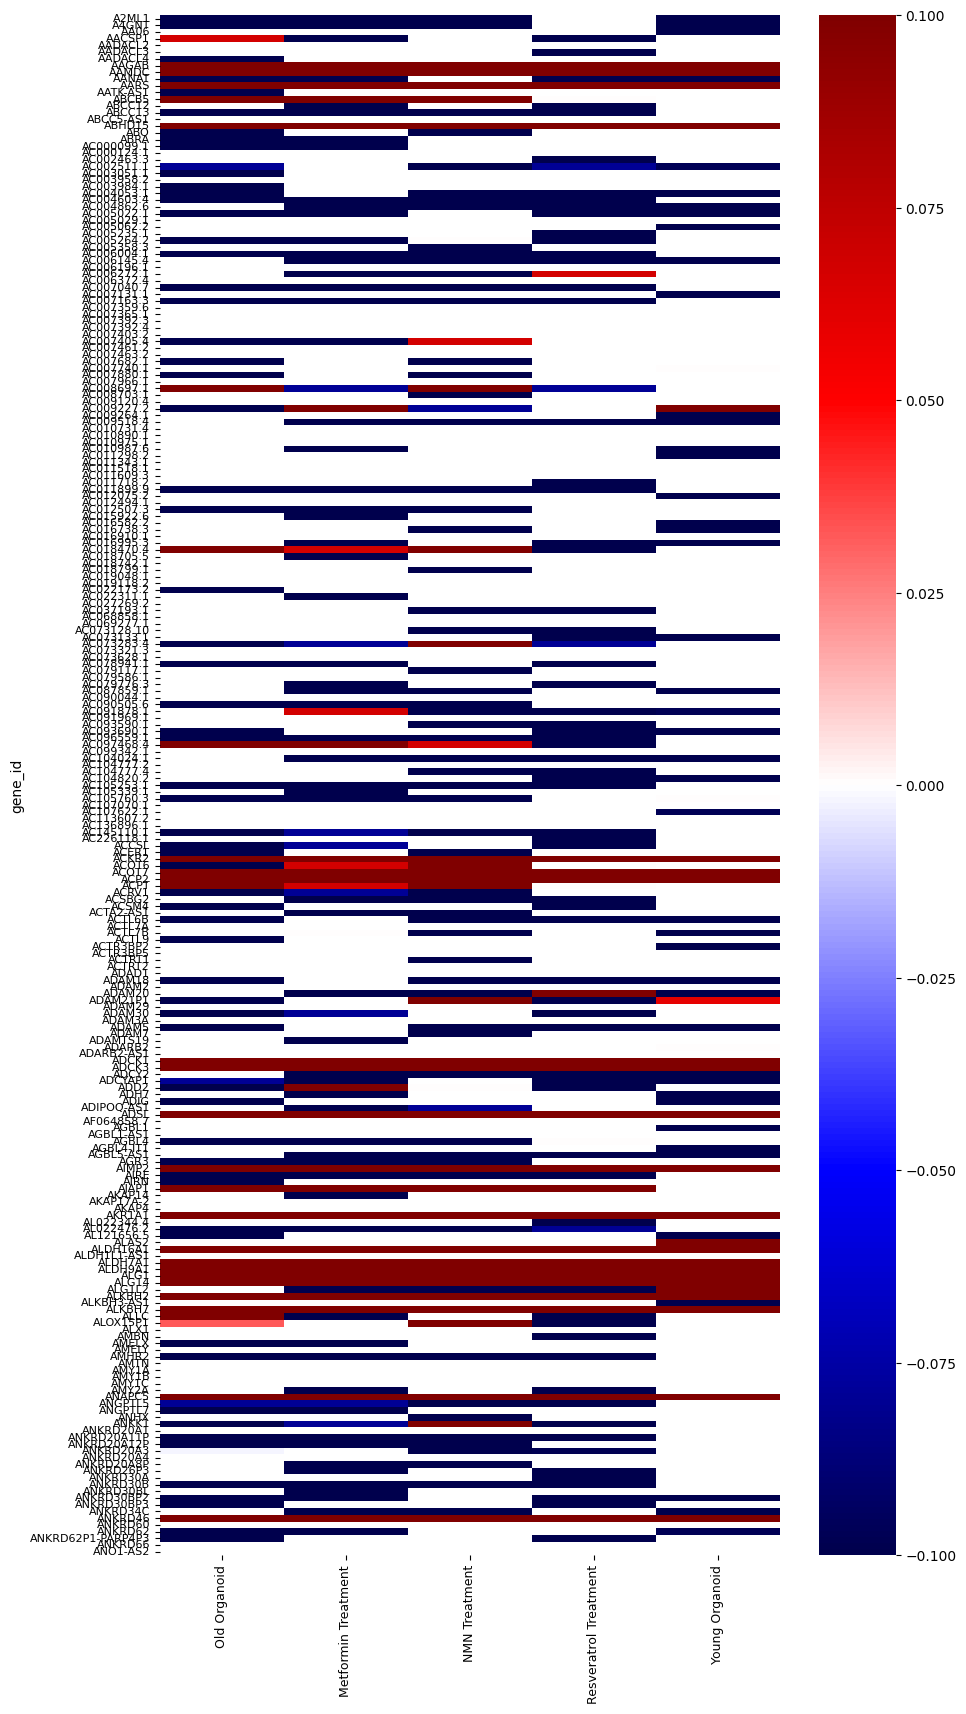

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import numpy as np
from bioinfokit import analys, visuz
import math


# extract names column
table = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")
genes = table.iloc[:, 0]

# identify columns based sample type
oo_cols = table.filter(regex=r'^old_organoid').columns
tm_cols = table.filter(regex=r'^treatment_met').columns
tn_cols = table.filter(regex='^treatment_nmn').columns
tr_cols = table.filter(regex='^treatment_res').columns
yo_cols = table.filter(regex=r'^young_organoid').columns


# get averages of each gene of each sample
oo_avg = table[oo_cols].mean(axis=1)
tm_avg = table[tm_cols].mean(axis=1)
tn_avg = table[tn_cols].mean(axis=1)
tr_avg = table[tr_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

#sort heat data
heat_data = {
    'Old Organoid':oo_avg,
    'Metformin Treatment':tm_avg,
    'NMN Treatment':tn_avg,
    'Resveratrol Treatment':tr_avg,
    'Young Organoid':yo_avg
}

# put into data frame
heat_table = pd.DataFrame(heat_data)
heat_table.index = genes
num_genes_left = 1000
heat_table = heat_table.head(num_genes_left)
heat_table

heat_table =(np.log10(heat_table))

# Calculate the standard deviation of each row
row_std = heat_table.apply(np.std, axis=1)

# Set a threshold for the minimum standard deviation
threshold = 0.03

# Filter out rows with standard deviation below the threshold
filtered_heat_table = heat_table[row_std >= threshold]

# Get the indices of the filtered rows
filtered_indices = filtered_heat_table.index

# Remove the filtered rows from the original heat_table
heat_table = heat_table.drop(filtered_indices)

# heatmap with hierarchical clustering 
#visuz.gene_exp.hmap(df=heat_table, dim=(3, 6), tickfont=(6, 4))

print(heat_table.shape[0])

# heatmap without hierarchical clustering 
visuz.gene_exp.hmap(df=heat_table, rowclus=False, colclus=False, dim=(10, 20), tickfont=(9, 8), show=True)


In [ ]:
oo_data = heat_table.columns['Old Organoid']
tm_data = heat_table.columns['Metformin Treatment']
tn_data = heat_table.columns['NMN Treatment']
tr_data = heat_table.columns['Resveratrol Treatment']
yo_data = heat_table.columns['Young Organoid']


In [ ]:
# Define the width and height of the figure
fig_width = 120
fig_height = 12

# Create a new figure with the specified size
plt.figure(figsize=(fig_width, fig_height))

# Get the column names from heat_table
column_names = heat_table.columns

# Plot line graphs for each column
for column in column_names:
    plt.plot(heat_table.index, heat_table[column], label=column)

# Set plot title and labels
plt.title('Column Comparison')
plt.xlabel('Row')
plt.ylabel('Value')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import seaborn as sns

# Generate the scatter plot matrix
sns.pairplot(heat_table)

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = heat_table.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates

# Create a copy of the heat_table DataFrame
normalized_heat_table = heat_table.copy()

# Normalize the values in the DataFrame to a common scale
normalized_heat_table = (normalized_heat_table - normalized_heat_table.min()) / (normalized_heat_table.max() - normalized_heat_table.min())

# Add a target column for coloring the lines (optional)
normalized_heat_table['target'] = range(len(normalized_heat_table))

# Create the parallel coordinates plot
parallel_coordinates(normalized_heat_table, 'target', colormap='coolwarm')

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of scatter plots
sns.pairplot(heat_table, diag_kind='kde')

# Show the plot
plt.show()

In [ ]:
plt.plot(heat_table, marker='x')

/Users/jonahdiamond/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


100001 100001


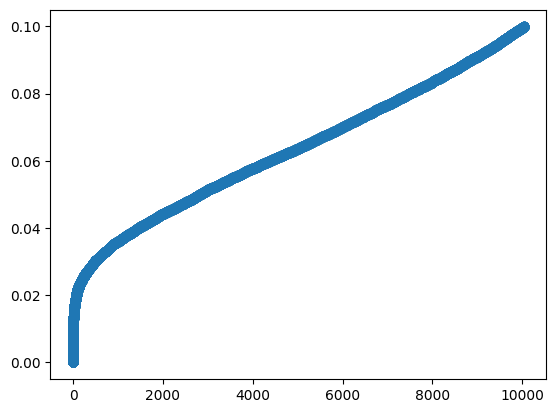

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import numpy as np
from bioinfokit import analys, visuz
import math


# extract names column
table = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")
genes = table.iloc[:, 0]

# identify columns based sample type
oo_cols = table.filter(regex=r'^old_organoid').columns
tm_cols = table.filter(regex=r'^treatment_met').columns
tn_cols = table.filter(regex='^treatment_nmn').columns
tr_cols = table.filter(regex='^treatment_res').columns
yo_cols = table.filter(regex=r'^young_organoid').columns


# get averages of each gene of each sample
oo_avg = table[oo_cols].mean(axis=1)
tm_avg = table[tm_cols].mean(axis=1)
tn_avg = table[tn_cols].mean(axis=1)
tr_avg = table[tr_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

#sort heat data
heat_data = {
    'Old Organoid':oo_avg,
    'Metformin Treatment':tm_avg,
    'NMN Treatment':tn_avg,
    'Resveratrol Treatment':tr_avg,
    'Young Organoid':yo_avg
}

# put into data frame
heat_table = pd.DataFrame(heat_data)
heat_table.index = genes

#heat_table = heat_table.head(num_genes_left)
#heat_table

heat_table =(np.log10(heat_table))

# Calculate the standard deviation of each row
row_std = heat_table.apply(np.std, axis=1)

# Store number of genes left
xlens = []
ylens = []

# Set a threshold for the minimum standard deviation
for threshold in np.arange(0.0, 0.1, 0.000001):

    # Filter out rows with standard deviation below the threshold
    filtered_heat_table = heat_table[row_std <= threshold]
    xlength = filtered_heat_table.shape[0]
    xlens.append(xlength)
    ylens.append(threshold)

print(len(xlens), len(ylens))

plt.scatter(xlens, ylens)


In [98]:
table = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")

# List of important genes to include in heatmap
hm_genes = ['ATP6', 'ATP8', 'CBX5', 'CCND1', 'CDK4', 'CDK6', 'CDKN1A', 'CDKN2A', 'CDKN2A', 'CHD3', 'CHD4', 'CHD5', 'COX1', 'COX2', 'COX3', 'CXCL5', 'CYTB', 'GCP-1', 'GCP-2', 'GM-CSE', 'GROa', 'ICAM1', 'IKBKA', 'IKBKG', 'IL6', 'IL7R', 'MCP-1', 'MDM2', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5', 'ND6', 'NFKB1', 'NFKB2', 'OPG', 'POT1', 'PTGES2', 'RB1', 'RELA', 'TERF1', 'TERF2', 'TERT', 'TIMP2', 'TP53', 'bFGF', 'uPAR']
#hm_genes = sorted(hm_genes) #sort genes

# identify columns based sample type
oo_cols = table.filter(regex=r'^old_organoid').columns
tm_cols = table.filter(regex=r'^treatment_met').columns
tn_cols = table.filter(regex='^treatment_nmn').columns
tr_cols = table.filter(regex='^treatment_res').columns
yo_cols = table.filter(regex=r'^young_organoid').columns


# get averages of each gene of each sample
oo_avg = table[oo_cols].mean(axis=1)
tm_avg = table[tm_cols].mean(axis=1)
tn_avg = table[tn_cols].mean(axis=1)
tr_avg = table[tr_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

#sort heat data
heatmap_data = {
    'Old Organoid':oo_avg,
    'Metformin Treatment':tm_avg,
    'NMN Treatment':tn_avg,
    'Resveratrol Treatment':tr_avg,
    'Young Organoid':yo_avg
}

# put into data frame
filtered_df = table[table['gene_id'].isin(hm_genes)]

heatmap = pd.DataFrame(filtered_df)
heatmap.index = hm_genes
num_genes = len(hm_genes)
#heatmap = heatmap.head(num_genes)
#heatmap

heatmap =(np.log10(heatmap))

"""# Calculate the standard deviation of each row
row_std = heatmap.apply(np.std, axis=1)

# Set a threshold for the minimum standard deviation
threshold = 0.03

# Filter out rows with standard deviation below the threshold
filtered_heatmap = heatmap[row_std >= threshold]

# Get the indices of the filtered rows
filtered_hm_indices = filtered_heatmap.index

# Remove the filtered rows from the original heat_table
heatmap = heatmap.drop(filtered_hm_indices)
"""

# heatmap with hierarchical clustering 
#visuz.gene_exp.hmap(df=heat_table, dim=(3, 6), tickfont=(6, 4))

#print(heatmap.shape[0])

# heatmap without hierarchical clustering 
visuz.gene_exp.hmap(df=heatmap, rowclus=False, colclus=False, dim=(10, 20), tickfont=(9, 8), show=True)
"""
heat_table = pd.DataFrame(heat_data)
heat_table.index = genes

#heat_table = heat_table.head(num_genes_left)
#heat_table

heat_table = (np.log10(heat_table))

# Calculate the standard deviation of each row
row_std = heat_table.apply(np.std, axis=1)
"""

ValueError: Length mismatch: Expected axis has 26 elements, new values have 49 elements

In [95]:
heatmap

,gene_id,gene_name,old_human3_17A,old_human3_17B,old_human3_18A,old_human3_18B,old_human4_19A,old_human4_19B,old_human4_20A,old_human4_20B,...,young_human1_14B,young_human2_15A,young_human2_15B,young_human2_16A,young_human2_16B,young_organoid_27A,young_organoid_27B,young_organoid_28A,young_organoid_28B,young_organoid_29B
2951,CBX5,CBX5,538.000,549.000,492.002,536.173,152.000,161.000,64.001,74.000,...,317.000,423.000,445.000,440.000,445.000,3855.693,3937.000,4189.001,4325.000,4509.000
3171,CCND1,CCND1,3325.000,3448.000,3516.000,3445.000,332.000,381.000,142.000,162.000,...,3208.000,902.000,976.000,1053.000,1116.000,452.000,536.937,443.929,505.000,282.876
3416,CDK4,CDK4,343.000,297.000,373.000,360.000,203.000,188.000,123.000,157.000,...,514.000,462.000,423.000,499.000,459.000,1462.000,1539.000,1668.000,1619.000,1619.000
3423,CDK6,CDK6,213.000,235.000,242.000,255.000,88.000,98.000,126.000,113.000,...,276.000,124.000,91.000,128.000,137.000,320.000,333.000,340.000,380.000,350.000
3433,CDKN1A,CDKN1A,520.000,512.000,531.000,540.000,390.999,389.000,168.000,166.000,...,523.000,1149.000,1181.000,1311.000,1253.000,5542.000,5606.000,6372.000,6622.000,5965.000
3436,CDKN2A,CDKN2A,1.000,4.000,5.000,2.645,2.169,2.000,1.000,0.000,...,7.000,0.000,0.000,0.000,2.000,2659.446,2616.039,2672.920,2859.487,2603.559
3647,CHD3,CHD3,16.000,16.000,18.000,20.000,35.000,46.000,17.000,14.000,...,262.000,34.000,58.000,34.000,47.000,1684.000,1746.999,1730.000,1712.000,1554.999
3648,CHD4,CHD4,1283.999,1251.000,1329.000,1339.000,709.000,744.000,312.000,266.000,...,1961.000,1668.000,1726.000,1820.000,1798.000,4212.986,4228.980,4467.999,4547.992,4188.000
3649,CHD5,CHD5,0.000,0.000,1.000,2.000,0.000,0.000,0.000,2.000,...,1.000,0.000,1.000,2.000,4.000,19.014,21.020,9.000,13.009,6.000
4559,CXCL5,CXCL5,0.000,0.000,0.000,0.000,0.000,1.014,0.000,0.000,...,2.025,1.015,1.006,0.000,0.000,404.838,414.363,409.379,421.136,505.917


/Users/jonahdiamond/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

divide by zero encountered in log10



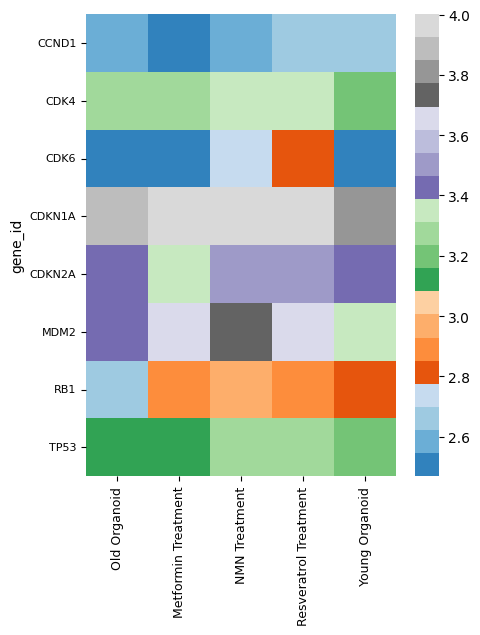

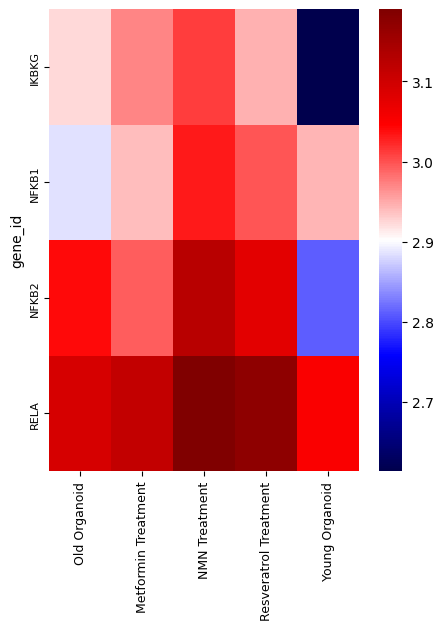

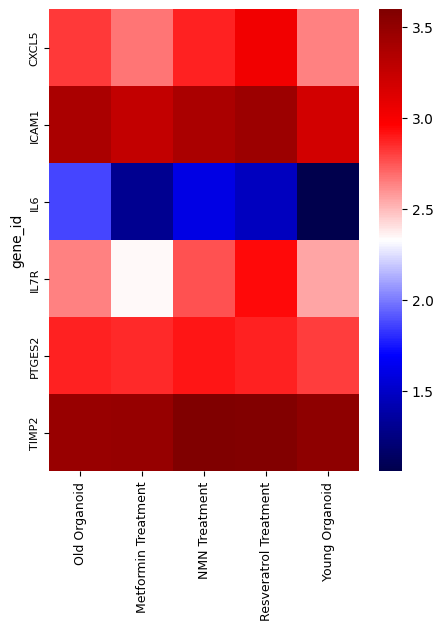

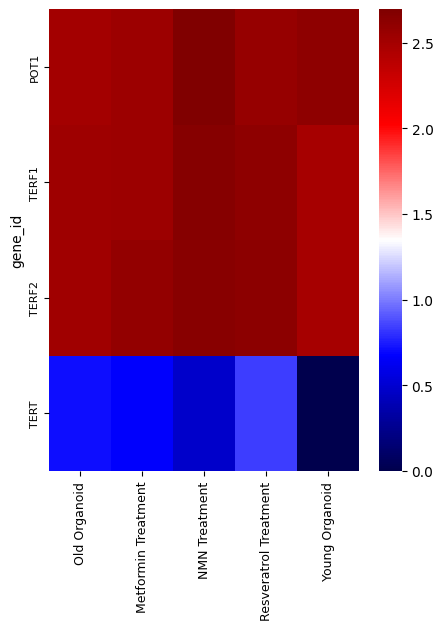

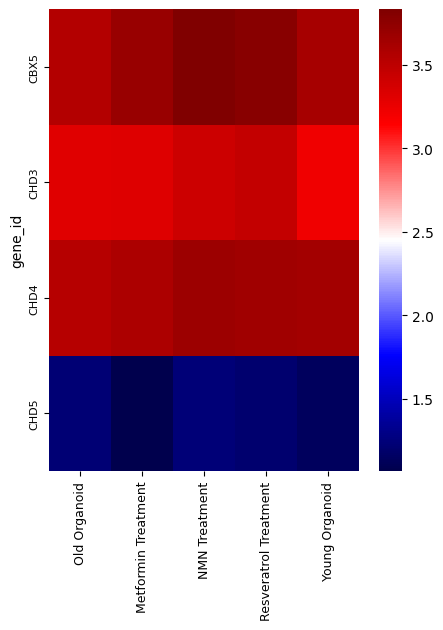

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bioinfokit import analys, visuz

# Read the data
table = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep = "\t")
genes = table.iloc[:, 0]

# remove gene name columns so they don't interfere with PCA
#table = table.drop(columns=['gene_name', 'gene_id'])

# List of important genes to include in the heatmap
hm_genes = ['ATP6', 'ATP8', 'CBX5', 'CCND1', 'CDK4', 'CDK6', 'CDKN1A', 'CDKN2A', 'CDKN2A', 'CHD3', 'CHD4', 'CHD5', 'COX1', 'COX2', 'COX3', 'CXCL5', 'CYTB', 'GCP-1', 'GCP-2', 'GM-CSE', 'GROa', 'ICAM1', 'IKBKA', 'IKBKG', 'IL6', 'IL7R', 'MCP-1', 'MDM2', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5', 'ND6', 'NFKB1', 'NFKB2', 'OPG', 'POT1', 'PTGES2', 'RB1', 'RELA', 'TERF1', 'TERF2', 'TERT', 'TIMP2', 'TP53', 'bFGF', 'uPAR']
hm_group1 = ['MDM2', 'CDKN1A', 'CDKN2A', 'TP53', 'RB1', 'CDK6', 'CDKN2A', 'CDK4', 'CCND1']
hm_group2 = ['RELA', 'NFKB2', 'NFKB1', 'IKBKG', 'IKBKA']
hm_group3 = ['GCP-2', 'CXCL5', 'ICAM1', 'IL7R', 'TIMP2', 'GM-CSE', 'bFGF', 'GROa', 'GCP-1', 'uPAR', 'MCP-1', 'OPG', 'IL6', 'PTGES2']
hm_group4 = ['ATP6', 'ATP8', 'ND2', 'ND1', 'ND4', 'ND4L', 'COX1', 'ND5', 'ND6', 'CYTB', 'ND3', 'COX3', 'COX2']
hm_group5 = ['TERT', 'TERF1', 'TERF2', 'POT1']
hm_group6 = ['CBX5', 'CHD3', 'CHD4', 'CHD5']

# Identify columns based on sample type
oo_cols = table.filter(regex=r'^old_organoid').columns
tm_cols = table.filter(regex=r'^treatment_met').columns
tn_cols = table.filter(regex='^treatment_nmn').columns
tr_cols = table.filter(regex='^treatment_res').columns
yo_cols = table.filter(regex=r'^young_organoid').columns

# Get averages of each gene for each sample type
oo_avg = table[oo_cols].mean(axis=1)
tm_avg = table[tm_cols].mean(axis=1)
tn_avg = table[tn_cols].mean(axis=1)
tr_avg = table[tr_cols].mean(axis=1)
yo_avg = table[yo_cols].mean(axis=1)

# Sort heat data
heat_data = {
    'Old Organoid': oo_avg,
    'Metformin Treatment': tm_avg,
    'NMN Treatment': tn_avg,
    'Resveratrol Treatment': tr_avg,
    'Young Organoid': yo_avg
}
# print(heat_data)

# Create the heat table with the important genes
heatmap = pd.DataFrame(heat_data)
heatmap.set_index(pd.Index(genes), inplace=True)
# remove gene name columns so they don't interfere with PCA
#table = table.drop(columns=['gene_name', 'gene_id'])

# Log-transform the data
heatmap = np.log10(heatmap)

heatmap = heatmap[heatmap.index.isin(hm_genes)]
heatmap_group1 = heatmap[heatmap.index.isin(hm_group1)]
heatmap_group2 = heatmap[heatmap.index.isin(hm_group2)]
heatmap_group3 = heatmap[heatmap.index.isin(hm_group3)]
heatmap_group4 = heatmap[heatmap.index.isin(hm_group4)]
heatmap_group5 = heatmap[heatmap.index.isin(hm_group5)]
heatmap_group6 = heatmap[heatmap.index.isin(hm_group6)]
# 
#heatmap = heatmap.dropna()

# Generate the heatmap without hierarchical clustering
visuz.gene_exp.hmap(df=heatmap_group1, figname='Heatmap Group 1', cmap='tab20c', rowclus=False, colclus=False, dim=(5, 6), tickfont=(9, 8), show=True)
visuz.gene_exp.hmap(df=heatmap_group2, figname='Heatmap Group 2', rowclus=False, colclus=False, dim=(5, 6), tickfont=(9, 8), show=True)
visuz.gene_exp.hmap(df=heatmap_group3, figname='Heatmap Group 3', rowclus=False, colclus=False, dim=(5, 6), tickfont=(9, 8), show=True)
#visuz.gene_exp.hmap(df=heatmap_group4, figname='Heatmap Group 4', rowclus=False, colclus=False, dim=(5, 6), tickfont=(9, 8), show=True)
visuz.gene_exp.hmap(df=heatmap_group5, figname='Heatmap Group 5', rowclus=False, colclus=False, dim=(5, 6), tickfont=(9, 8), show=True)
visuz.gene_exp.hmap(df=heatmap_group6, figname='Heatmap Group 6', rowclus=False, colclus=False, dim=(5, 6), tickfont=(9, 8), show=True)

